In [21]:
from os.path import join, exists
from glob import glob

import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import moten

In [22]:
dir_root = '/mnt/ext5/DRN'
dir_behav = join(dir_root, 'behav_data')

In [23]:
subj = 'DRN04'

In [62]:
run = 'Run1'
list_png = sorted(glob(join(dir_behav, subj, 'resized/%s/*'%run)))
sample = Image.open(list_png[0])
(h, w, c) = np.array(sample).shape
vhsize = (h,w)
fps = 10

In [27]:
pyramid = moten.pyramids.MotionEnergyPyramid(
    stimulus_vhsize=vhsize
    ,stimulus_fps=fps,
)

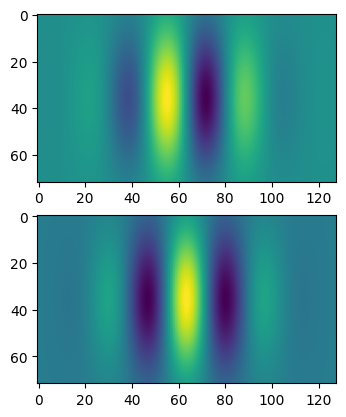

In [38]:
fig, axs = plt.subplots(nrows=2)

for ii, sf in enumerate(pyramid.get_filter_spatial_quadrature()):
    ax = axs[ii]
    ax.imshow(sf)

---

In [66]:
imgs = np.zeros((len(list_png)-1, h, w))
for ii, png in enumerate(list_png[:-1]):
    img = Image.open(png).convert('L')
    imgs[ii] = np.array(img)

In [67]:
pyramid = moten.get_default_pyramid(vhsize=vhsize, fps=10)
moten_features = pyramid.project_stimulus(imgs)

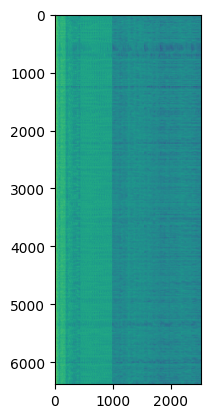

In [68]:
plt.imshow(moten_features)